<a href="https://colab.research.google.com/github/cedricbansah/data-science-practice/blob/master/week_6_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descriptive Statistics

In [3]:
import pandas as pd 
dataset = pd.read_csv('housing.csv') #loading the dataset
dataset.head(3) #checking out the first three rows of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
dataset.shape #viewing the shape of the dataset

(1460, 81)

Loading the Sales Price column

In [8]:
sales_price = pd.Series(dataset['SalePrice'])
sales_price.head(15)

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
Name: SalePrice, dtype: int64

## Measurs of Central Tendency

### Mean

In [11]:
import numpy as np 
mean_sp = np.mean(sales_price)
mean_sp

180921.19589041095

Finding mean is not a good approach as the 'Mean is often affected by Outliers' or in simple words if there are some observations larger or smaller than majority of the other observations then the mean tends to deviate towards these values.

To generalize it if the distribution of datasets is skewed(troubled by outliers), we do not choose mean. Here we will have to go for Median.

### Median

In [28]:
import numpy as np

q1_sp = sales_price.quantile(0.25) #lower quartile
median_sp = sales_price.median() #median
q3_sp = sales_price.quantile(0.75) #upper quartile
iqr = q3_sp - q1_sp
print("Lower Quartile: ", q1_sp)
print("Median: ", median_sp)
print("Upper Quartile: ", q3_sp)
print("Interquartile Range: ", iqr)

Lower Quartile:  129975.0
Median:  163000.0
Upper Quartile:  214000.0
Interquartile Range:  84025.0


Mean = 180921.19589041095

Median = 163000.0

That is almost a difference of around 20000. This set of observations is definitely skewed

In [15]:
import matplotlib.pyplot as plt
def box_plot():
  plt.boxplot(sales_price)
  plt.show()

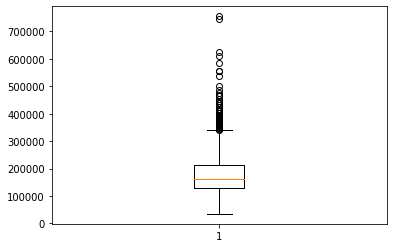

In [18]:
box_plot()

The Boxplot above shows some additional observations above MAXIMUM. These are Outliers.

In [22]:
#code to find number of outliers 

outlier_lower_limit = q1_sp - 1.5 * iqr 
outlier_upper_limit = q3_sp + 1.5 * iqr 
print(outlier_lower_limit)
print(outlier_upper_limit)

3937.5
340037.5


In [23]:
lowerlimit_outliers = sales_price[sales_price < outlier_lower_limit].count()
upperlimit_outliers = sales_price[sales_price > outlier_upper_limit].count()

print("Upper Outliers: ", upperlimit_outliers)
print("Lower Outliers: ", lowerlimit_outliers)

Upper Outliers:  61
Lower Outliers:  0


Another way of checking if the median should be considered is by plotting a histogram and observing the bins 

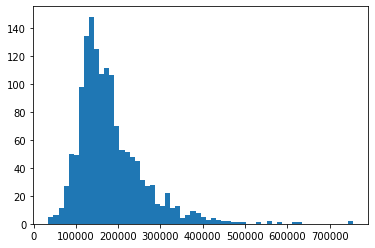

In [24]:
plt.hist(sales_price, bins=60)
plt.show()

By observing the histogram it is evident that the data peaks towards the left side of the histogram therefore the data is positively skewed

### Mode

In [27]:
mode_sp = sales_price.mode()
mode_sp

0    140000
dtype: int64

### Plotting The Median, Mean and Mode for the SalePrice Column

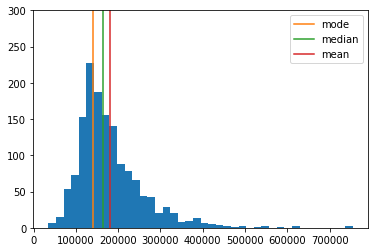

In [32]:
plt.figure()
plt.hist(sales_price,bins=40)
plt.plot([mode_sp]*300, range(300), label='mode')
plt.plot([median_sp]*300, range(300), label='median')
plt.plot([mean_sp]*300, range(300), label='mean')
plt.ylim(0,300)
plt.legend()
plt.show()

## Spread of the data 

### Range

In [34]:
range_sp = np.max(sales_price) - np.min(sales_price)
range_sp

720100

### Variance

In [35]:
variance_sp = sales_price.var()
variance_sp

6311111264.297451

### Standard Deviation

In [36]:
from math import sqrt 
std_sp = sqrt(variance_sp)
std_sp

79442.50288288663

In [37]:
#How far is the price of a particular house from the mean when compared to other points in the dataset?
(250000-mean_sp)/std_sp

0.8695446593799336

## Correlation 

In [41]:
#What is the correlation between Sales Price and the Living Room area? 
living_room_area = pd.Series(dataset['GrLivArea'])
np.corrcoef(sales_price, living_room_area)[0,1] # Returns Pearson product-moment correlation coefficients.

0.7086244776126523

### Heatmaps

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.263116    0.180403   0.263843
GrLivArea   0.263116   1.000000    0.468997   0.708624
GarageArea  0.180403   0.468997    1.000000   0.623431
SalePrice   0.263843   0.708624    0.623431   1.000000


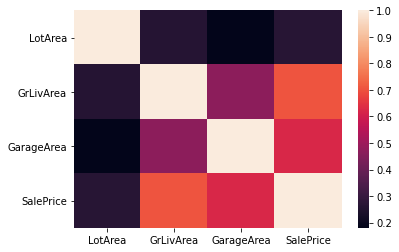

In [42]:
# Plotting a heatmap to see the correlation trend between different variables 
import seaborn as sns
%matplotlib inline 
x = dataset[['LotArea', 'GrLivArea','GarageArea','SalePrice']]
corr = x.corr()  #computes pairwise correlation of columsn excluding null values
sns.heatmap(corr)
print(corr)

#Challenges

### Mean and Median for WInd Speed and Temperature columns

In [44]:
weatherdata = pd.read_csv('/content/weather_2012.csv')
wind_speed = pd.Series(weatherdata['Wind Spd (km/h)'])
temperature = pd.Series(weatherdata['Temp (C)'])

In [45]:
ws_mean = wind_speed.mean()
ws_median = wind_speed.median()
temp_mean = temperature.mean()
temp_median = temperature.median()
print('Mean of the Wind Speed column is: ', ws_mean, 'km/h')
print('Mean of the Temperature column is: ', temp_mean, 'C')
print('Median of the Wind Speed column is: ', ws_median, 'km/h')
print('Median of the Temperature column is: ', temp_median, 'C')

Mean of the Wind Speed column is:  14.94546903460838 km/h
Mean of the Temperature column is:  8.79814435336981 C
Median of the Wind Speed column is:  13.0 km/h
Median of the Temperature column is:  9.3 C


### Mode of Wind Speed column

In [48]:
ws_mode = wind_speed.mode()
print('Mode of the Wind Speed column is: ', ws_mode)

Mode of the Wind Speed column is:  0    9
dtype: int64


### Histogram of Wind Speed and Temperature to check skewness

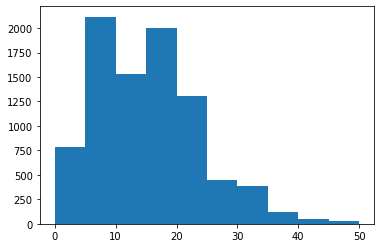

In [56]:
plt.hist(wind_speed, bins=range(0,55,5),histtype='bar')
plt.show()

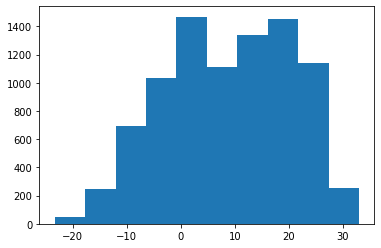

In [57]:
plt.hist(temperature, bins=10)
plt.show()